# Time Series forecasting using ARIMA

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Data Import and cleaning

In [2]:
# Data and package Import
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('/content/APPLE_daily.csv')
TempData.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097591,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102341,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106660,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112273,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122637,55574400


In [32]:
#Data Cleaning
AppleStockData = TempData.dropna()


AppleStockData.index = pd.to_datetime(AppleStockData.Date)

AppleStockData = AppleStockData["Adj Close"]['2021-01-01':'2023-12-30']
AppleStockData.describe()

count    753.000000
mean     154.845605
std       20.279402
min      114.511497
25%      140.385300
50%      151.692871
75%      171.611877
max      198.110001
Name: Adj Close, dtype: float64

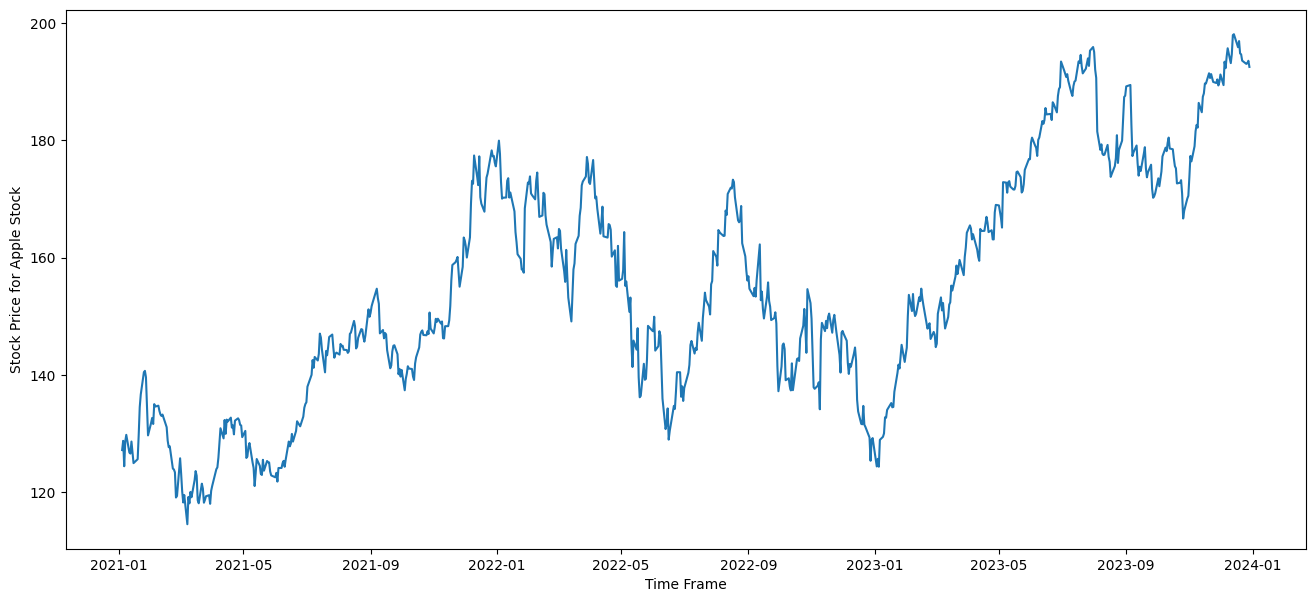

In [33]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for Apple Stock')
ax1.plot(AppleStockData)

**Checking stationarity**

Method 1 -  Rolling Statistics<br>
Method 2 -  Duckey fuller

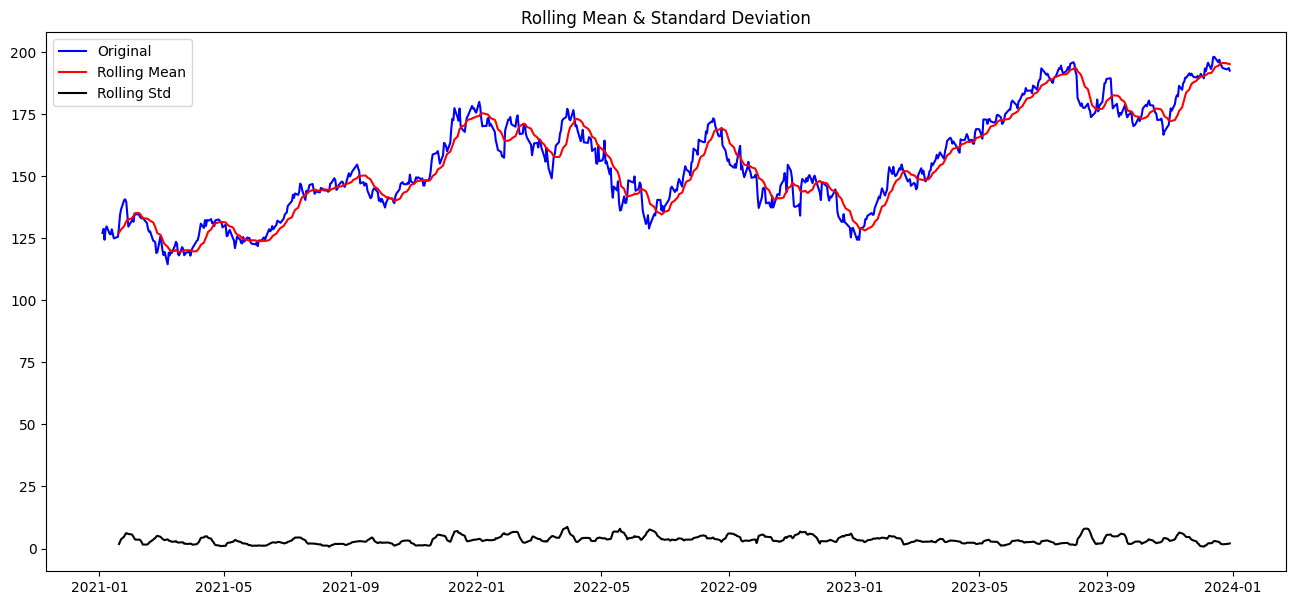

In [34]:
#Determing rolling statistics
rolLmean = AppleStockData.rolling(12).mean()
rolLstd = AppleStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(AppleStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

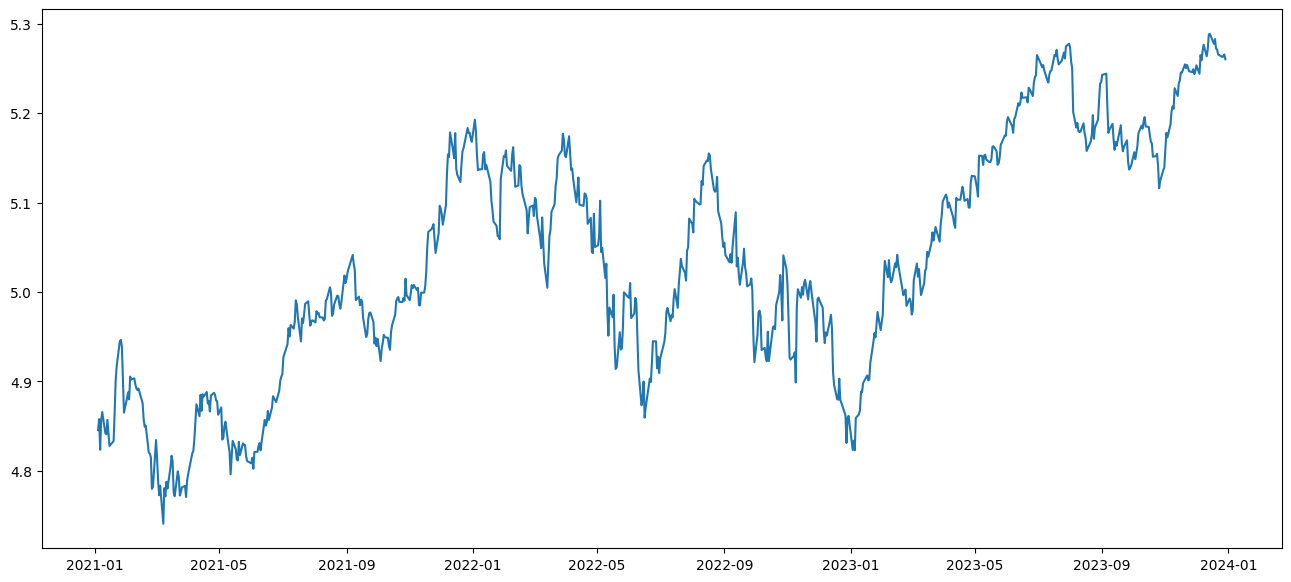

In [35]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(AppleStockData)
plt.plot(ts_log)

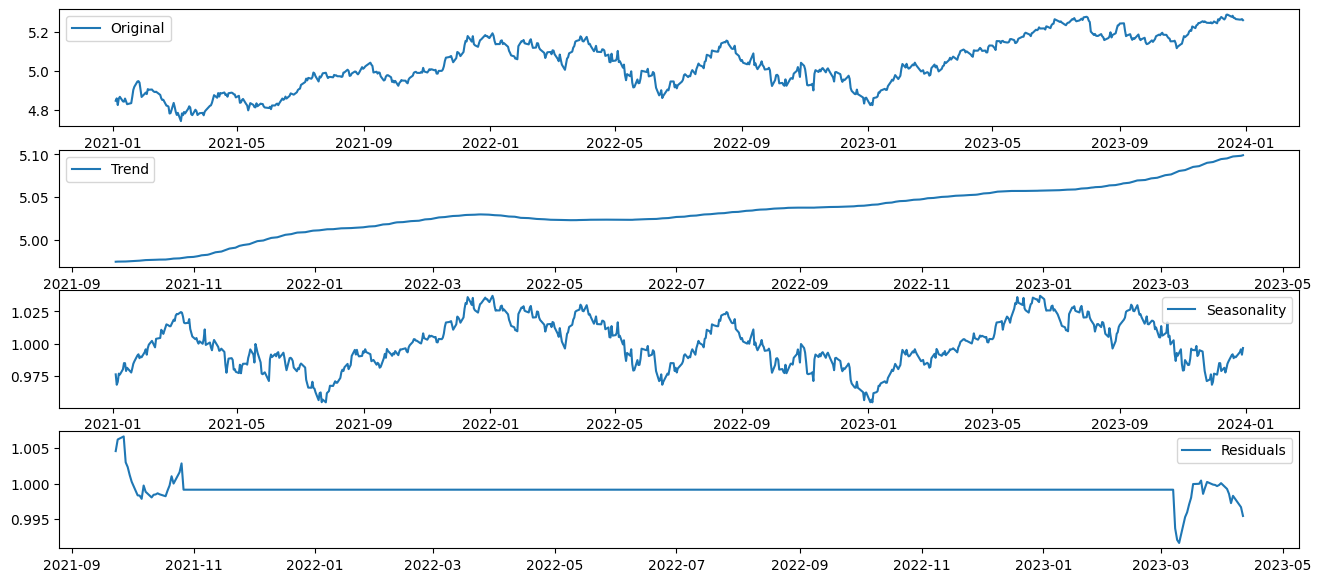

In [36]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model = 'multiplicative', period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

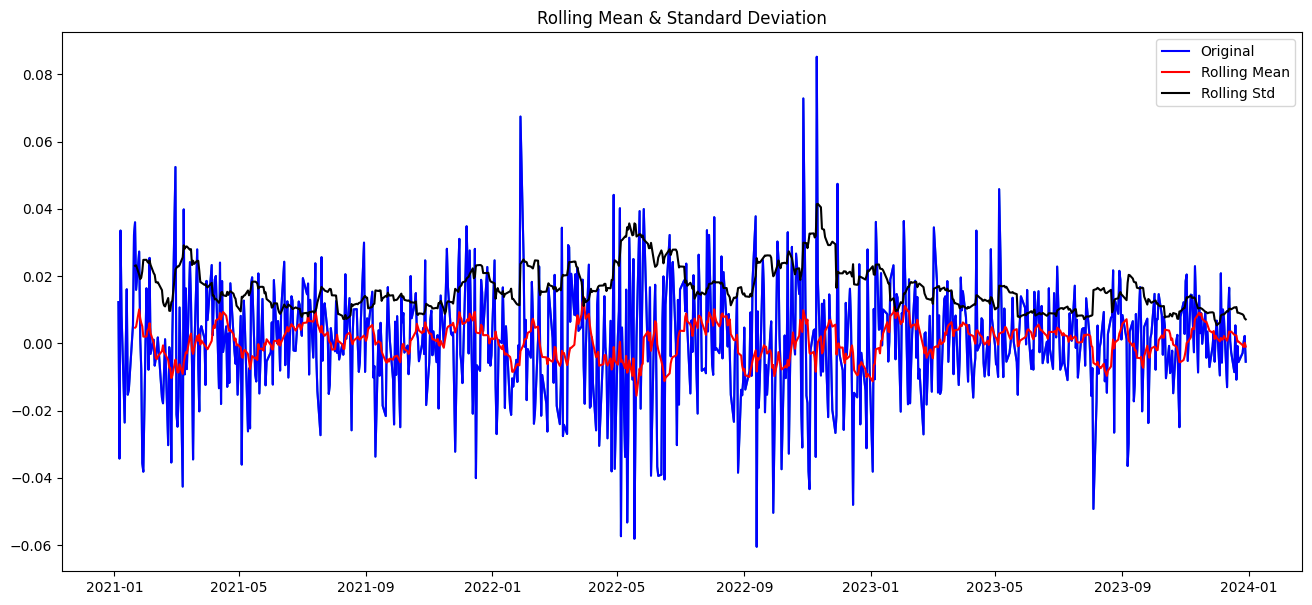

In [37]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [38]:
AppleStockData.sort_index(inplace= True)

In [39]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

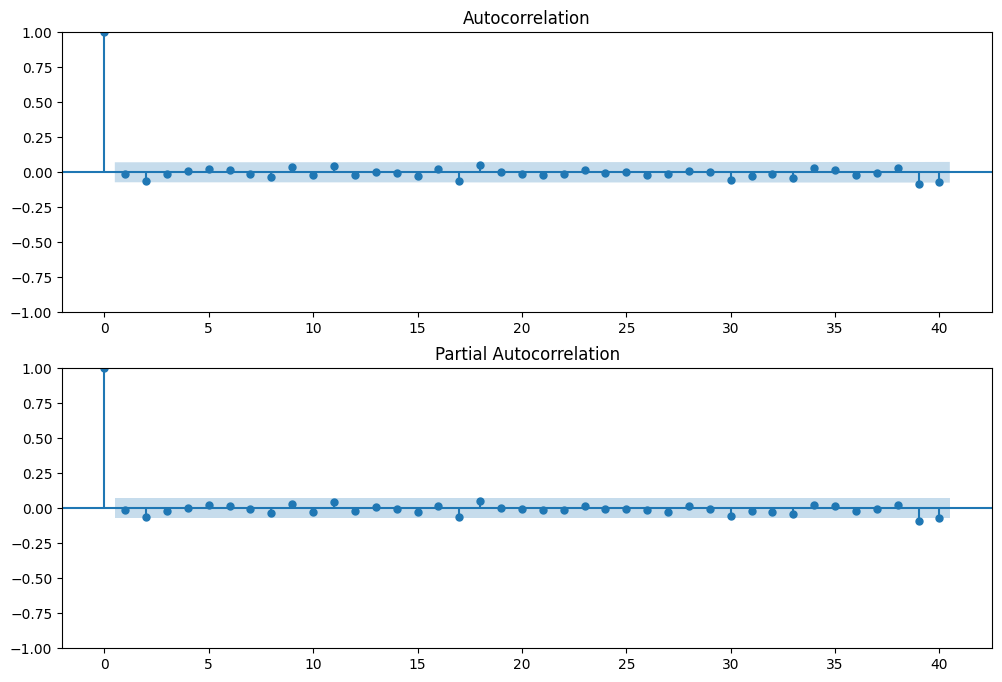

In [40]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [21]:
from statsmodels.tsa.arima.model import ARIMA


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


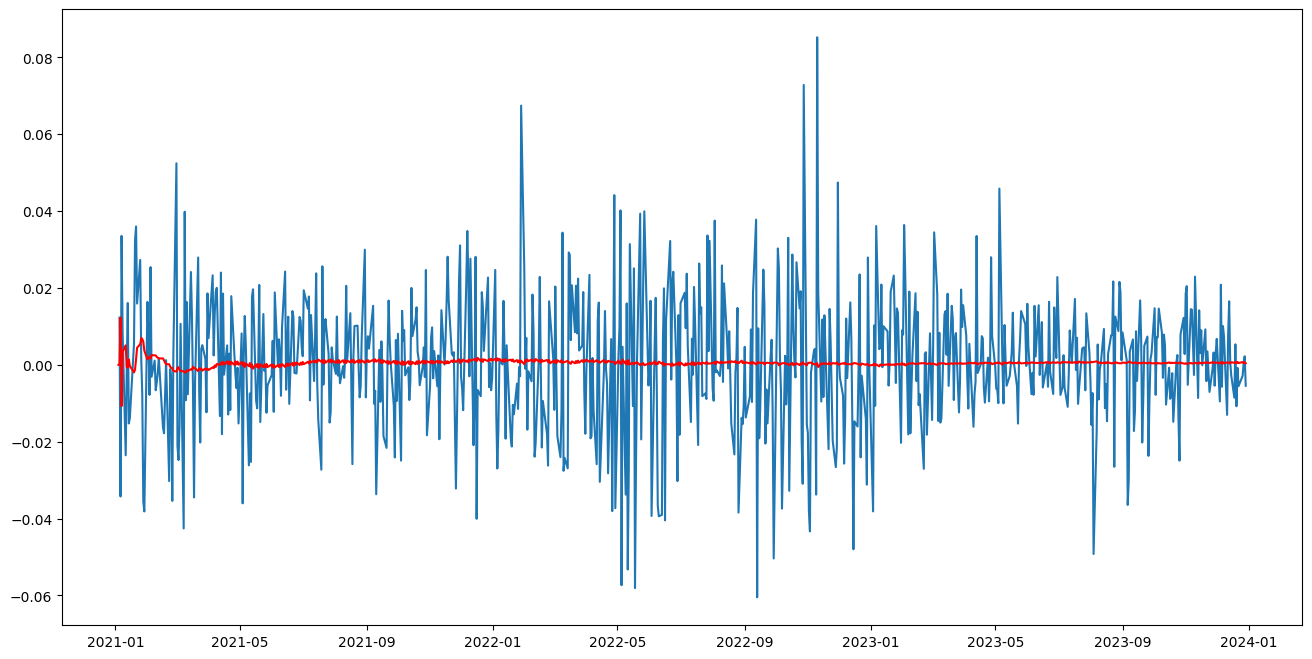

In [47]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Taking results back to original scale

In [48]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2021-01-04    0.000000
2021-01-05    0.000000
2021-01-06    0.012288
2021-01-07   -0.010737
2021-01-08    0.003411
dtype: float64


In [49]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2021-01-04    0.000000
2021-01-05    0.000000
2021-01-06    0.012288
2021-01-07    0.001551
2021-01-08    0.004962
dtype: float64


In [50]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2021-01-04    4.845479
2021-01-05    4.845479
2021-01-06    4.857767
2021-01-07    4.847029
2021-01-08    4.850441
dtype: float64

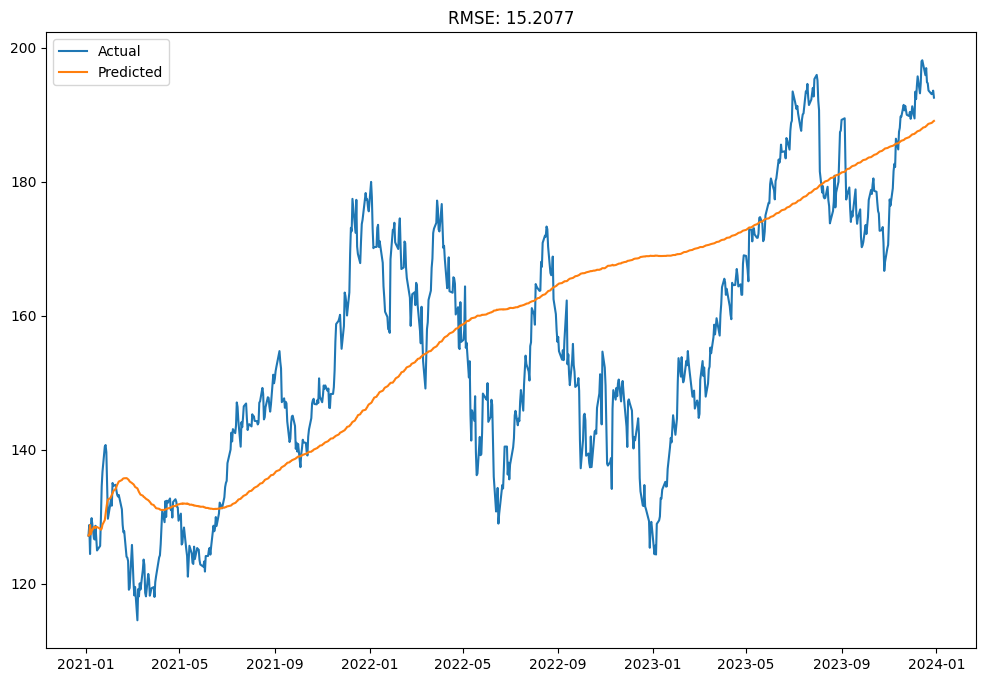

In [57]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(AppleStockData, label = 'Actual')
plt.plot(predictions_ARIMA , label = 'Predicted')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-AppleStockData)**2)/len(AppleStockData)))
plt.legend()

In [51]:
results_ARIMA.predict(10,20)

Date
2021-01-19   -0.001960
2021-01-20   -0.001229
2021-01-21    0.001437
2021-01-22    0.004459
2021-01-25    0.005363
2021-01-26    0.006968
2021-01-27    0.006724
2021-01-28    0.006001
2021-01-29    0.003699
2021-02-01    0.001472
2021-02-02    0.001680
Name: predicted_mean, dtype: float64

In [29]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00


In [52]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [53]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-3939.515, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3947.945, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3946.018, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3946.028, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3949.196, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3944.770, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.769 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)